* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
fdr

<module 'FinanceDataReader' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\FinanceDataReader\\__init__.py'>

## 상장종목 목록 가져오기

* 다음의 형태가 되도록 만들어 주세요.

|    | 종목별           |
|---:|:-----------------|
|  1 | 삼성전자         |
|  2 | LG에너지솔루션   |
|  3 | SK하이닉스       |
|  4 | 삼성바이오로직스 |
|  5 | NAVER            |
|  6 | 삼성SDI          |
|  7 | 현대차           |
|  8 | LG화학           |
|  9 | 카카오           |
| 10 | 기아             |

In [4]:
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"
print(url)


https://finance.naver.com/sise/entryJongmok.naver?&page=1


In [5]:
df = pd.read_html(url)
top_table = df[0][["종목별"]].dropna()
top_table

,종목별
1,삼성전자
2,LG에너지솔루션
3,SK하이닉스
4,삼성바이오로직스
5,NAVER
6,삼성SDI
7,현대차
8,LG화학
9,카카오
10,기아


## 전체 상장종목에서 종목코드와 종목명만 가져오기

* 아래의 형태가 되게 해주세요.
| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |

In [6]:
df_krx = fdr.StockListing("KRX")
df_krx.shape

(8018, 10)

In [7]:
df_krx = df_krx[["Name", "Symbol"]]
df_krx.head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


## merge 를 통한 시가총액 상위 10개 종목 만들기

### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>



* 아래의 형태가 되게 만들며, Name을 인덱스로 지정합니다.
| Name             |   Symbol |
|:-----------------|---------:|
| 삼성전자         |   005930 |
| LG에너지솔루션   |   373220 |
| SK하이닉스       |   000660 |
| 삼성바이오로직스 |   207940 |
| NAVER            |   035420 |
| 삼성SDI          |   006400 |
| 현대차           |   005380 |
| LG화학           |   051910 |
| 카카오           |   035720 |
| 기아             |   000270 |

In [8]:
top_table

,종목별
1,삼성전자
2,LG에너지솔루션
3,SK하이닉스
4,삼성바이오로직스
5,NAVER
6,삼성SDI
7,현대차
8,LG화학
9,카카오
10,기아


In [9]:
# 컬럼명 바꾸기 
# 열의 개수만큼 리스트 인자가 들어가 있어야함
top_table.columns = ['Name'] # 컬럼이 1개 이기때문에 속성 한개
# 딕셔너리 형태 df.rename(columns = {"종목별" : Name}, inplace = True)
df_krx_top = top_table.merge(df_krx, how = "left")
df_krx_top["Symbol"][1]

'373220'

In [10]:
fdr.DataReader('005930','2022')["Close"].tolist()

[78600,
 78700,
 77400,
 76900,
 78300,
 78000,
 78900,
 78900,
 77900,
 77300,
 77500,
 77000,
 76300,
 76500,
 75600,
 75100,
 74000,
 73300,
 71300,
 73300,
 73300,
 74000,
 73000,
 73500,
 74700,
 75400,
 74900,
 73700,
 73700,
 74800,
 75000,
 74300,
 74200,
 73400,
 73000,
 71500,
 71900,
 72100,
 71700,
 72900,
 71500,
 70100,
 69500,
 71200,
 70000,
 70200,
 69500,
 70400,
 71200,
 70700,
 69900,
 70300,
 70500,
 69800,
 69800,
 69700,
 70200,
 69900,
 69600,
 69100,
 69300,
 69200,
 68500,
 68000,
 67800,
 67900,
 67000,
 68700,
 67500,
 66600,
 66700,
 67300,
 67400,
 67700,
 67000,
 66300,
 66100,
 65000,
 64800,
 67400,
 67300,
 67500,
 67900,
 66500,
 66100,
 65700,
 65700,
 64900,
 66500,
 66300,
 67600,
 68100,
 67500,
 68000,
 67900,
 67500]

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [11]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
x = df_krx_top["Symbol"]
   
for i in x.tolist():
    item_list.append(fdr.DataReader(i,'2021')["Close"])
item_list
    


[Date
 2021-01-04    83000
 2021-01-05    83900
 2021-01-06    82200
 2021-01-07    82900
 2021-01-08    88800
               ...  
 2022-05-18    68100
 2022-05-19    67500
 2022-05-20    68000
 2022-05-23    67900
 2022-05-24    67500
 Name: Close, Length: 344, dtype: int64,
 Date
 2022-01-27    505000
 2022-01-28    450000
 2022-02-03    477000
 2022-02-04    504000
 2022-02-07    548000
                ...  
 2022-05-18    410000
 2022-05-19    415500
 2022-05-20    434000
 2022-05-23    438000
 2022-05-24    442000
 Name: Close, Length: 78, dtype: int64,
 Date
 2021-01-04    126000
 2021-01-05    130500
 2021-01-06    131000
 2021-01-07    134500
 2021-01-08    138000
                ...  
 2022-05-18    113500
 2022-05-19    111000
 2022-05-20    112500
 2022-05-23    113000
 2022-05-24    111000
 Name: Close, Length: 344, dtype: int64,
 Date
 2021-01-04    819298
 2021-01-05    822263
 2021-01-06    807438
 2021-01-07    809415
 2021-01-08    827204
                ...  
 2022-0

In [12]:
df = pd.concat(item_list, axis = 1)
df.columns = df_krx_top["Name"].tolist()
df

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,LG화학,카카오,기아
Date,,,,,,,,,,
2021-01-04,83000,NaN,126000,819298,293000,671000,207500,889000,79483,64000
2021-01-05,83900,NaN,130500,822263,292500,686000,209500,893000,78881,63700
2021-01-06,82200,NaN,131000,807438,290000,680000,203000,890000,79383,62200
2021-01-07,82900,NaN,134500,809415,289500,698000,206000,962000,80788,63000
2021-01-08,88800,NaN,138000,827204,312000,739000,246000,999000,87111,68300
...,...,...,...,...,...,...,...,...,...,...
2022-05-18,68100,410000.0,113500,793000,276500,603000,185500,512000,82600,84500
2022-05-19,67500,415500.0,111000,796000,271500,591000,182000,502000,80400,82100
2022-05-20,68000,434000.0,112500,808000,275000,605000,186500,545000,83000,83900


### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [13]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.



### 시각화를 위한 폰트 설정

In [14]:
import platform

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [15]:
#폰트 확인
get_font_family()

'Malgun Gothic'

In [19]:
import matplotlib.pyplot as plt
# 시각화를 위한 폰트설정

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당

# 폰트설정
plt.rc("font", family = get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus = False)
# 그래프 스타일 설정
plt.style.use("seaborn-paper")

In [20]:
plt.style.available # plot 바탕화면 변경

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:title={'center':'한글'}>

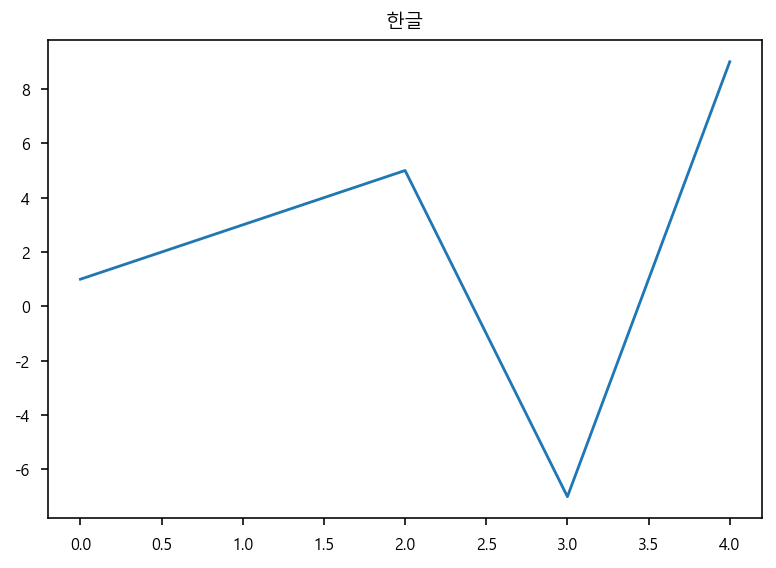

In [21]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 여러 종목 한번에 시각화 하기

<AxesSubplot:xlabel='Date'>

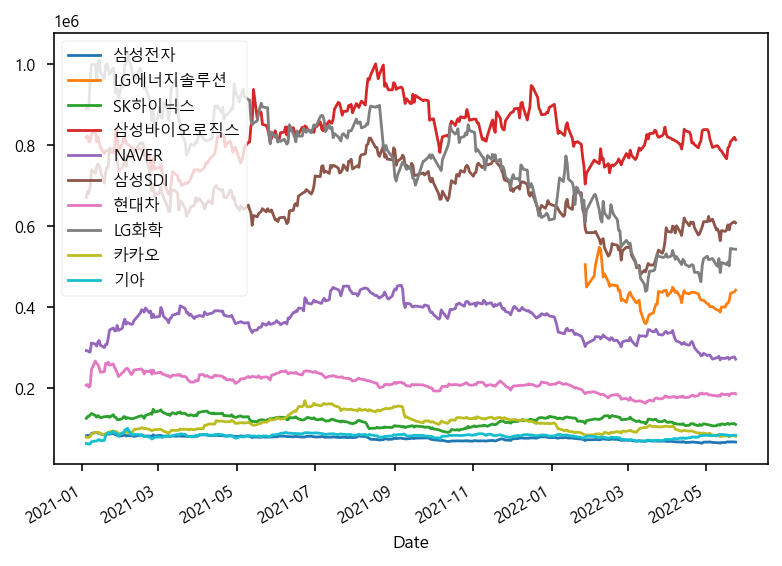

In [22]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

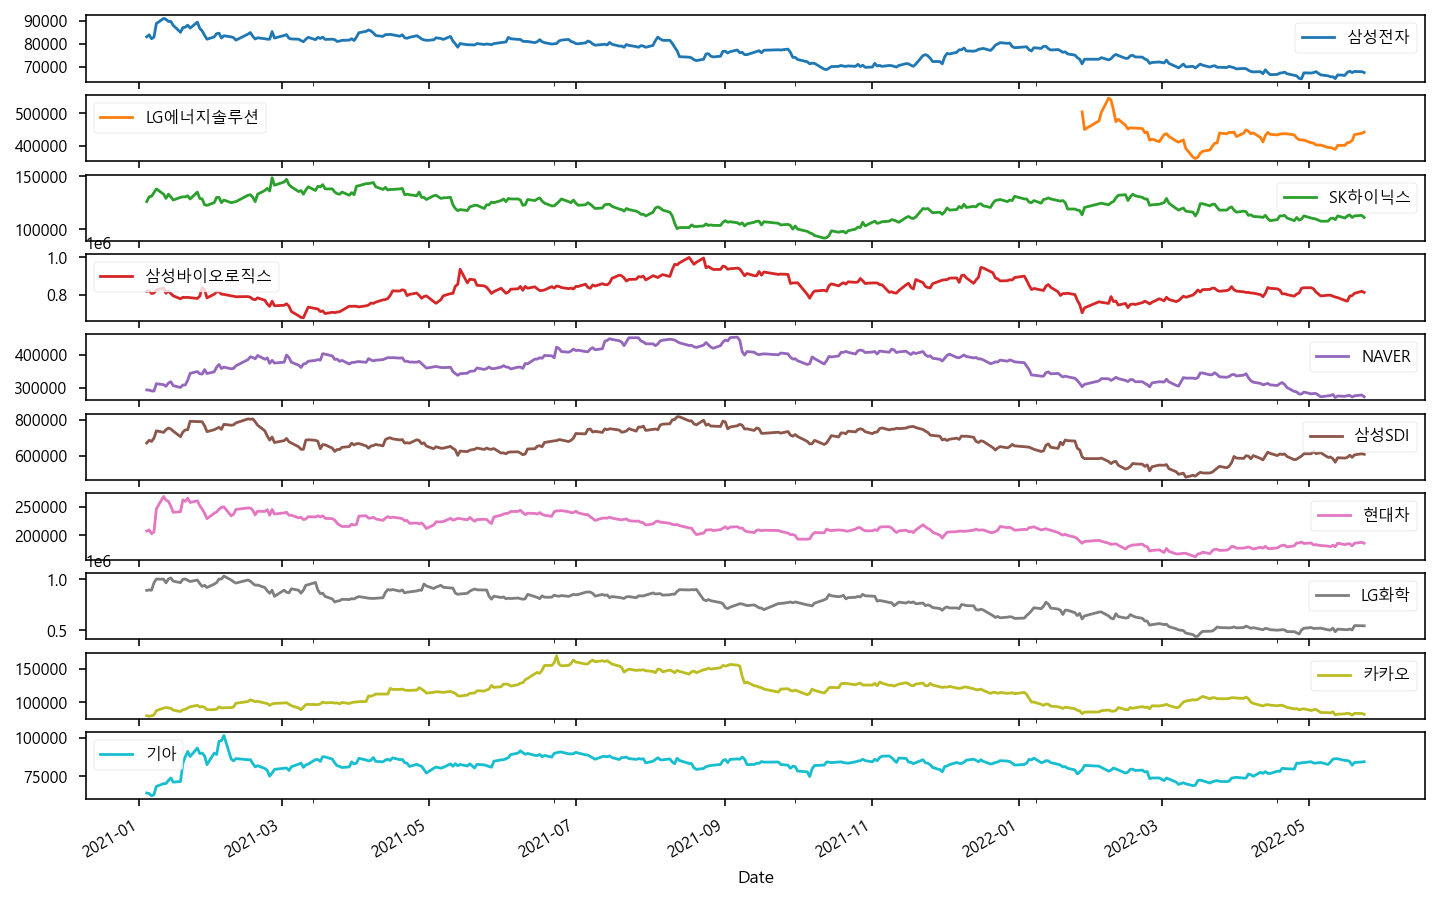

In [23]:
df.plot(subplots = True, figsize = (12,8))

<AxesSubplot:xlabel='Date'>

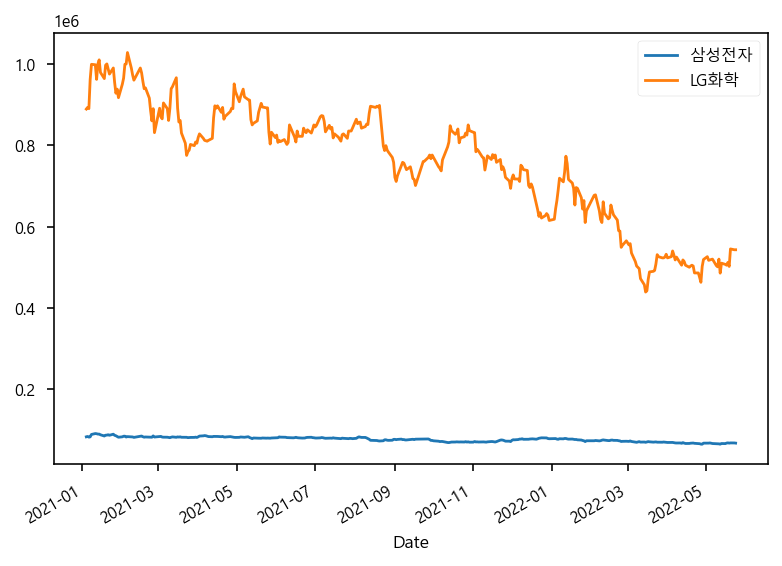

In [24]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자","LG화학"]].plot()

## 2축 그래프 사용하기

<AxesSubplot:xlabel='Date'>

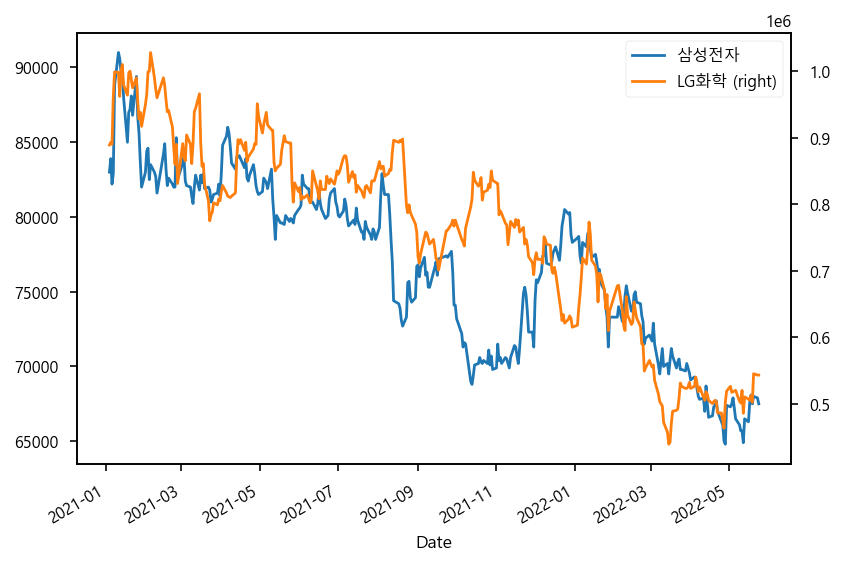

In [25]:
# secondary_y를 사용해 2축 그래프 그리기
df[["삼성전자","LG화학"]].plot(secondary_y = "LG화학")

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [26]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["LG화학", "삼성전자"]]
df2 = df2 / df2.iloc[0] -1
df2.head()

,LG화학,삼성전자
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.004499,0.010843
2021-01-06,0.001125,-0.009639
2021-01-07,0.082115,-0.001205
2021-01-08,0.123735,0.069880


<AxesSubplot:xlabel='Date'>

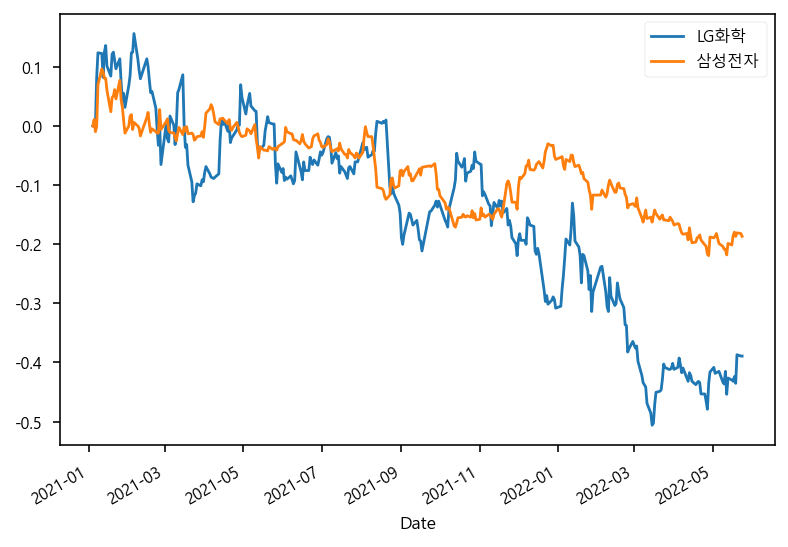

In [27]:
# 수익률 시각화 하기
df2.plot()

## pyplot의 subplots 로 서브플롯 그리기

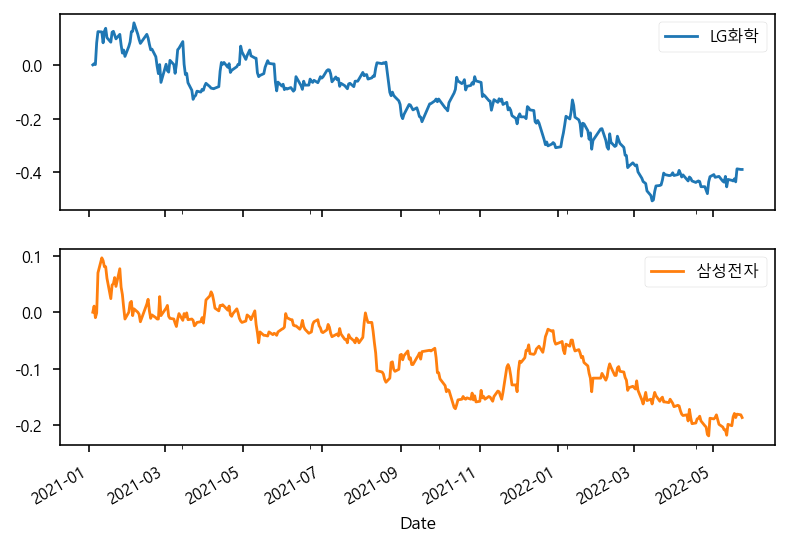

In [28]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

_ = df2.plot(subplots = True)

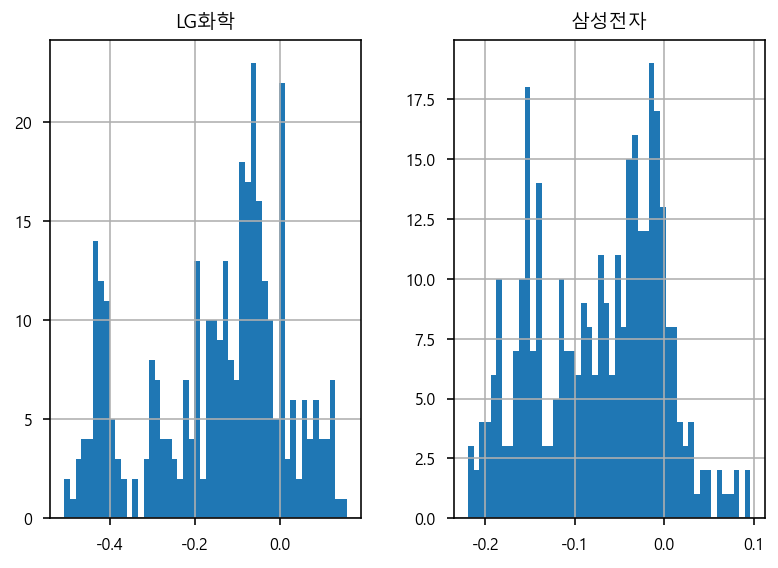

In [30]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
df2.hist(bins = 50)
plt.show()

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [31]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = (df / df.iloc[0]) - 1
LG_EG = df["LG에너지솔루션"].dropna()
df_norm["LG에너지솔루션"] = (LG_EG / LG_EG.iloc[0]) -1
df_norm

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,LG화학,카카오,기아
Date,,,,,,,,,,
2021-01-04,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,NaN,0.035714,0.003619,-0.001706,0.022355,0.009639,0.004499,-0.007574,-0.004687
2021-01-06,-0.009639,NaN,0.039683,-0.014476,-0.010239,0.013413,-0.021687,0.001125,-0.001258,-0.028125
2021-01-07,-0.001205,NaN,0.067460,-0.012063,-0.011945,0.040238,-0.007229,0.082115,0.016419,-0.015625
2021-01-08,0.069880,NaN,0.095238,0.009650,0.064846,0.101341,0.185542,0.123735,0.095970,0.067187
...,...,...,...,...,...,...,...,...,...,...
2022-05-18,-0.179518,-0.188119,-0.099206,-0.032098,-0.056314,-0.101341,-0.106024,-0.424072,0.039216,0.320312
2022-05-19,-0.186747,-0.177228,-0.119048,-0.028437,-0.073379,-0.119225,-0.122892,-0.435321,0.011537,0.282812
2022-05-20,-0.180723,-0.140594,-0.107143,-0.013790,-0.061433,-0.098361,-0.101205,-0.386952,0.044248,0.310938


### 전체 종목의 수익률 시각화

<AxesSubplot:xlabel='Date'>

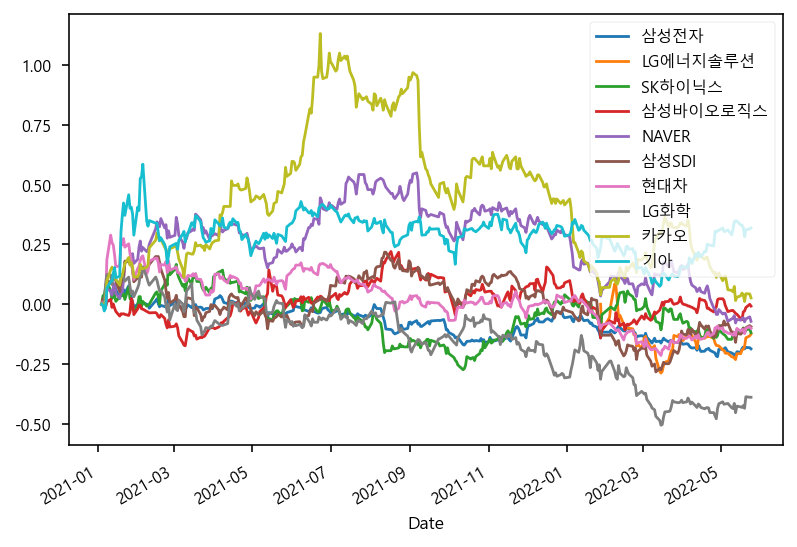

In [44]:
df_norm.plot()

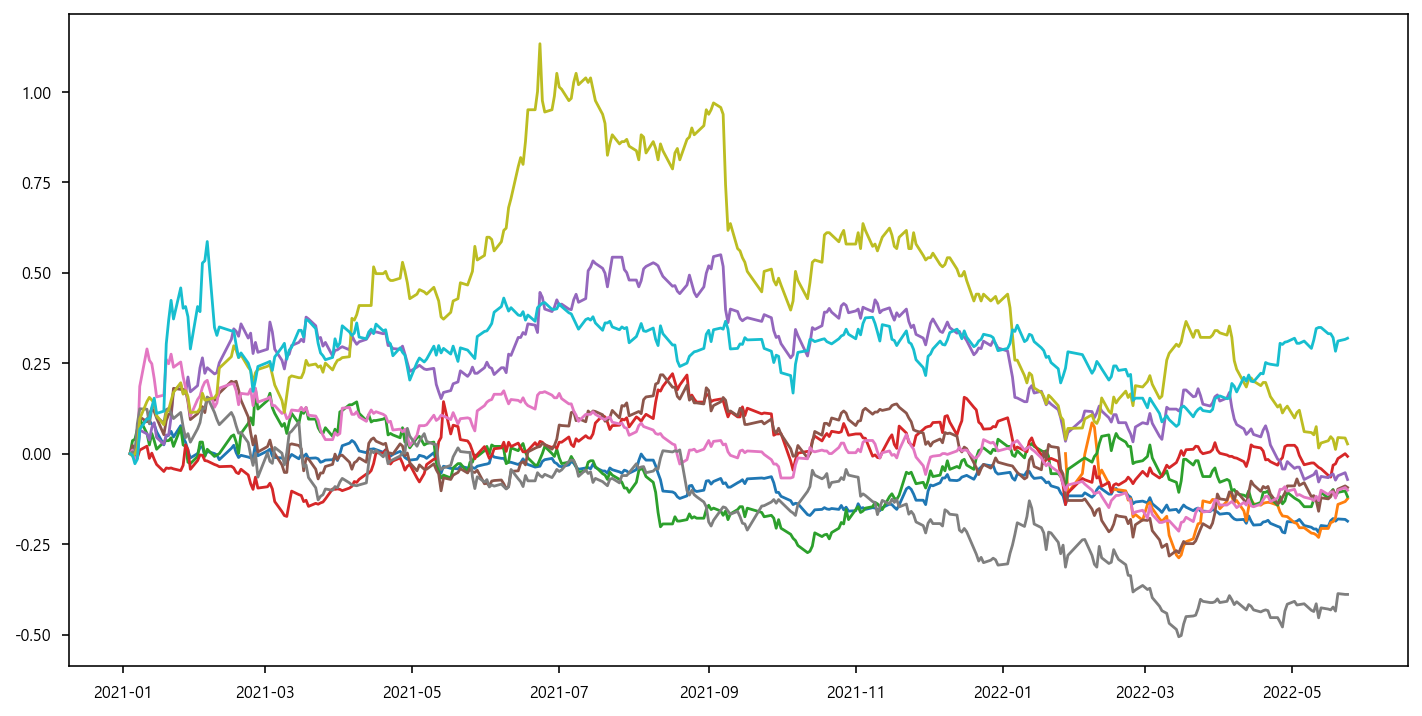

In [45]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
plt.figure(figsize = (12,6))
plt.plot(df_norm)

In [33]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,LG화학,카카오,기아
count,344.000000,78.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,-0.073525,-0.148718,-0.042548,0.010420,0.259445,0.002482,0.024328,-0.147603,0.433395,0.288422
std,0.070492,0.069786,0.092840,0.074392,0.155132,0.113088,0.108863,0.163945,0.282522,0.085608
min,-0.219277,-0.288119,-0.273810,-0.173704,-0.078498,-0.283159,-0.214458,-0.506187,-0.007574,-0.028125
25%,-0.138855,-0.191089,-0.115079,-0.035177,0.142491,-0.073398,-0.036145,-0.265467,0.190937,0.251562
50%,-0.064458,-0.142574,-0.027778,0.006031,0.288396,0.011177,0.022892,-0.101800,0.421688,0.304688
75%,-0.016566,-0.125248,0.019841,0.054282,0.372440,0.098733,0.108434,-0.033465,0.586817,0.340625
max,0.096386,0.085149,0.178571,0.220748,0.549488,0.217586,0.289157,0.156355,1.132531,0.585938


array([[<AxesSubplot:title={'center':'삼성전자'}>,
        <AxesSubplot:title={'center':'LG에너지솔루션'}>,
        <AxesSubplot:title={'center':'SK하이닉스'}>],
       [<AxesSubplot:title={'center':'삼성바이오로직스'}>,
        <AxesSubplot:title={'center':'NAVER'}>,
        <AxesSubplot:title={'center':'삼성SDI'}>],
       [<AxesSubplot:title={'center':'현대차'}>,
        <AxesSubplot:title={'center':'LG화학'}>,
        <AxesSubplot:title={'center':'카카오'}>],
       [<AxesSubplot:title={'center':'기아'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

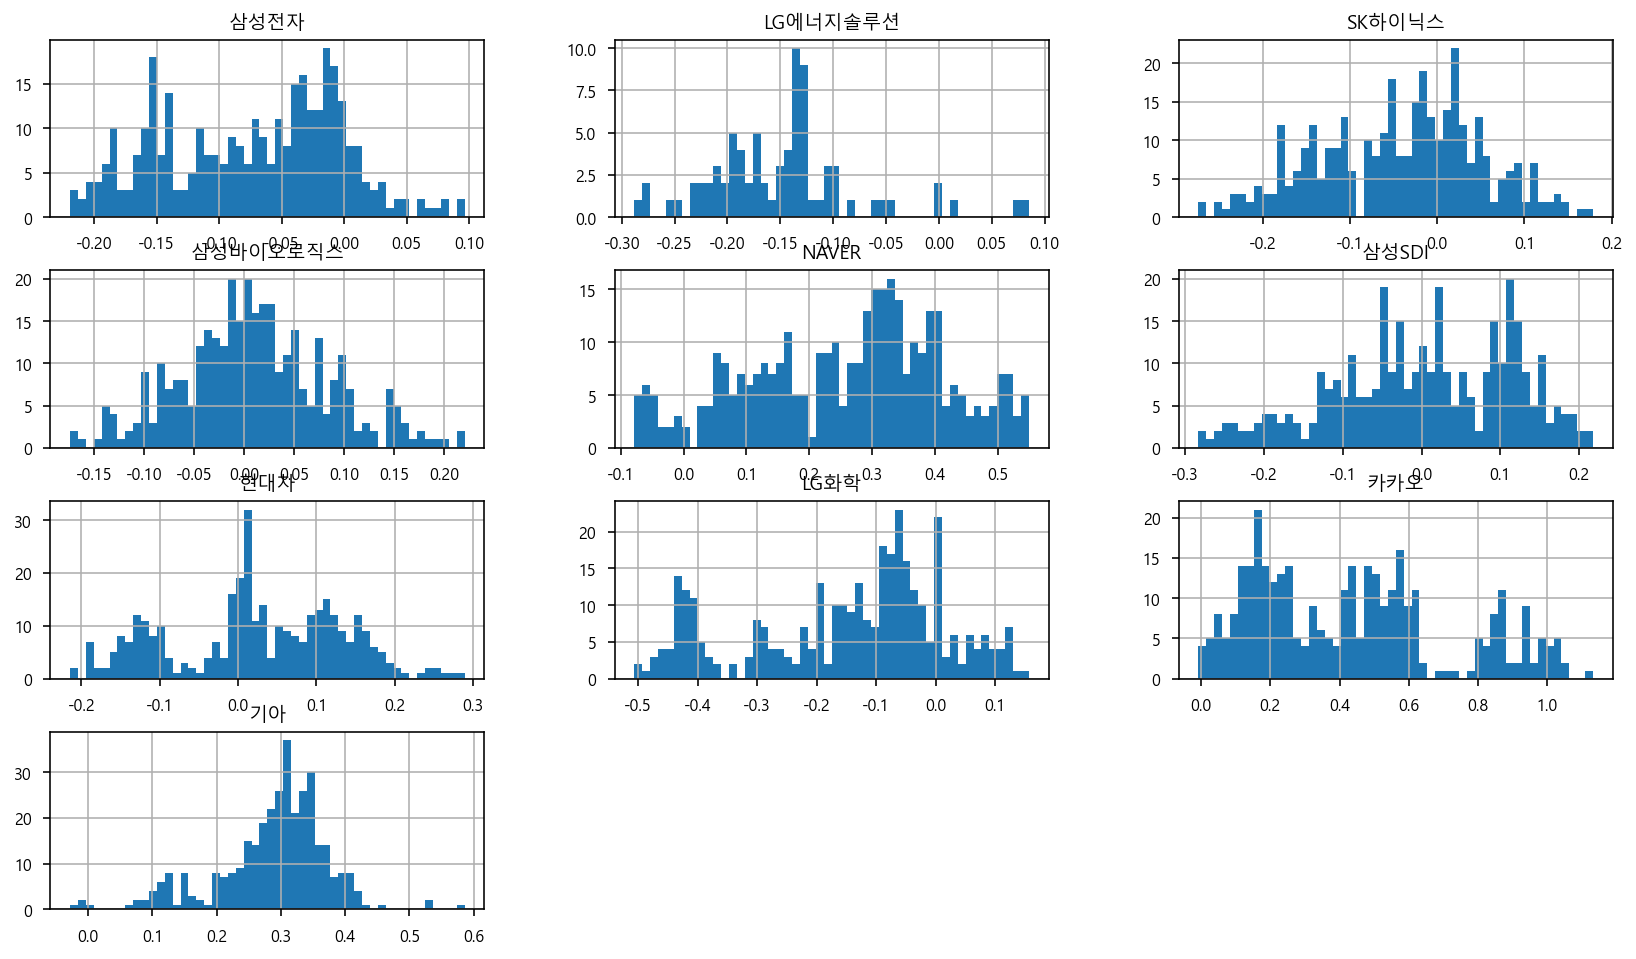

In [55]:
# 수익률에 대한 히스토그램 그리기
df_norm.hist(bins = 50, figsize = (14,8))

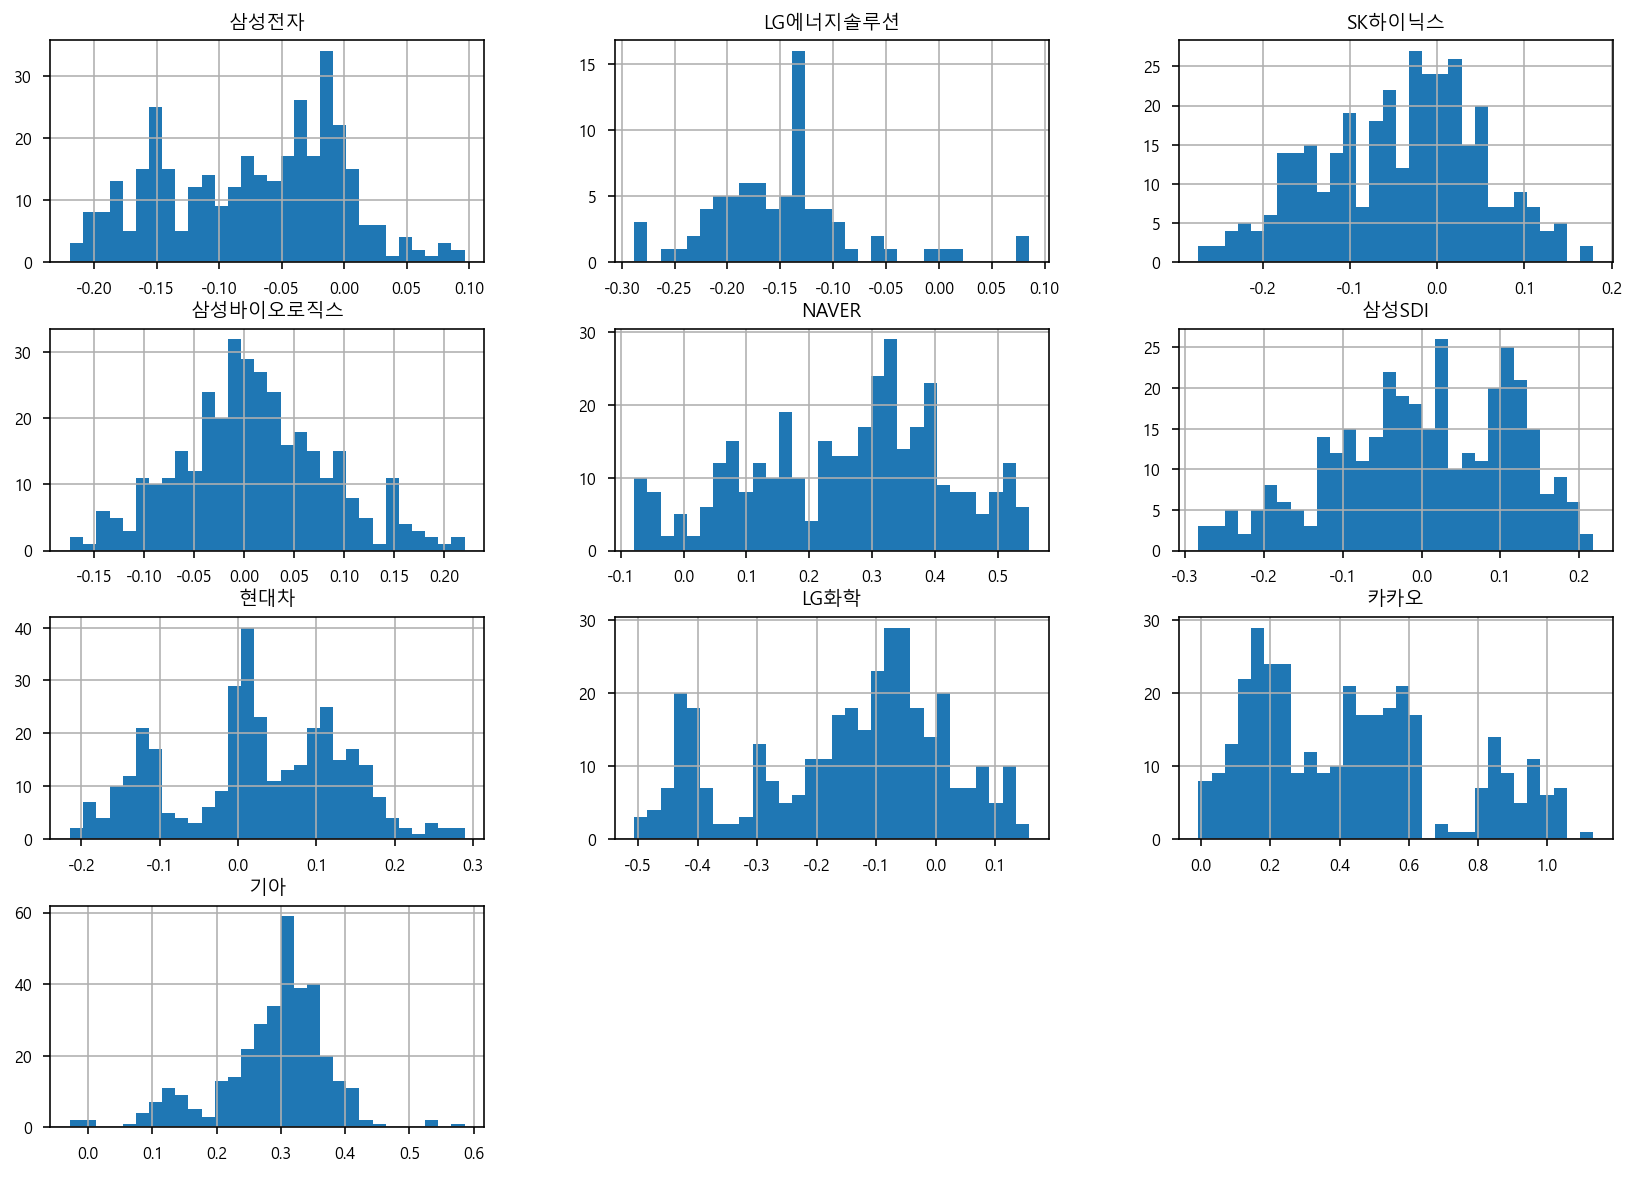

In [65]:
_ = df_norm.hist(bins = 30, figsize = (14,10))

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [66]:
df_norm.skew()

삼성전자       -0.142745
LG에너지솔루션    0.942426
SK하이닉스     -0.194515
삼성바이오로직스    0.193841
NAVER      -0.283696
삼성SDI      -0.360880
현대차        -0.159900
LG화학       -0.488219
카카오         0.546190
기아         -0.806741
dtype: float64

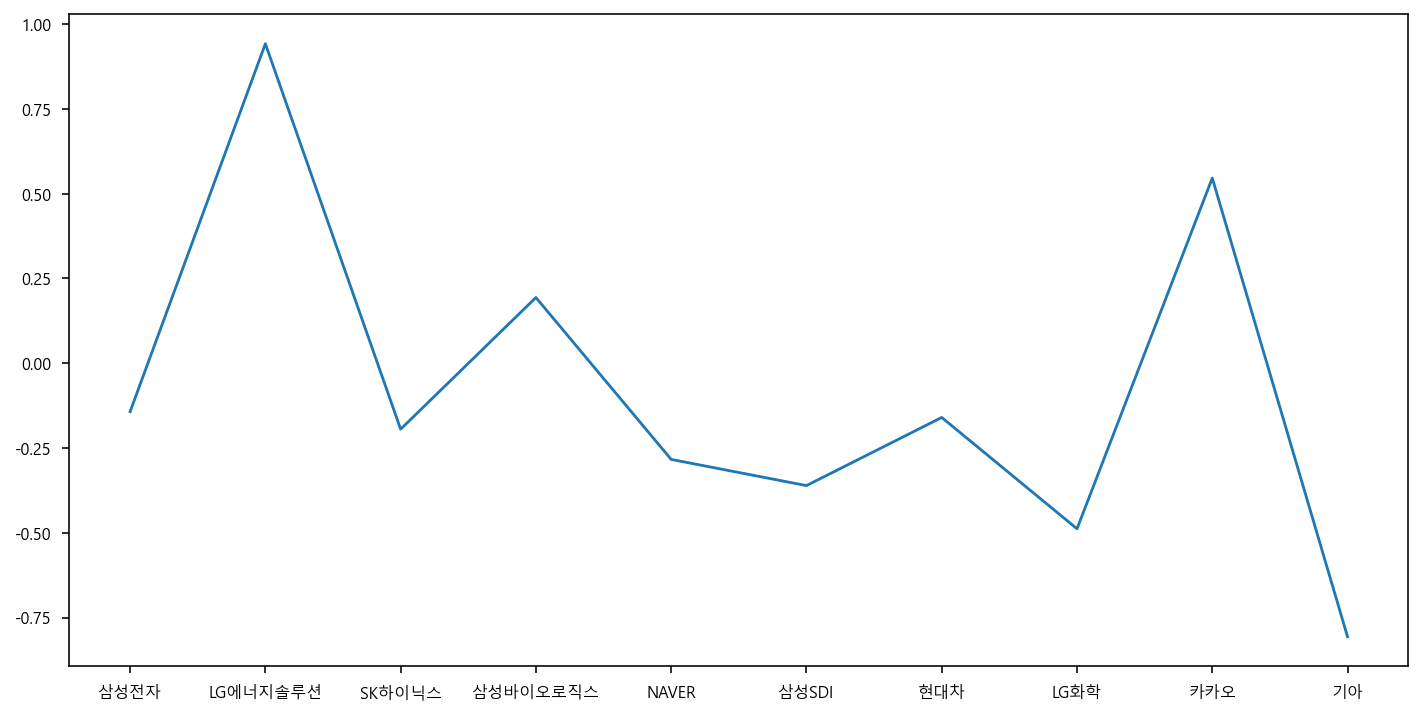

In [67]:
# skew 로 수익률의 왜도를 구합니다.
plt.figure(figsize = (12,6))
plt.plot(df_norm.skew())

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)



* [scipy.stats.kurtosis — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)
* Fisher의 정의를 사용하면 결과에서 3.0을 빼서 정규 분포에 대해 0.0이 됩니다.
* True 이면 피셔의 정의가 사용됩니다(정상 ==> 0.0). False이면 Pearson의 정의가 사용됩니다(정상 ==> 3.0)

In [68]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자       -0.876128
LG에너지솔루션    2.112710
SK하이닉스     -0.557047
삼성바이오로직스   -0.037322
NAVER      -0.689918
삼성SDI      -0.557119
현대차        -0.684114
LG화학       -0.731427
카카오        -0.687996
기아          1.696842
dtype: float64

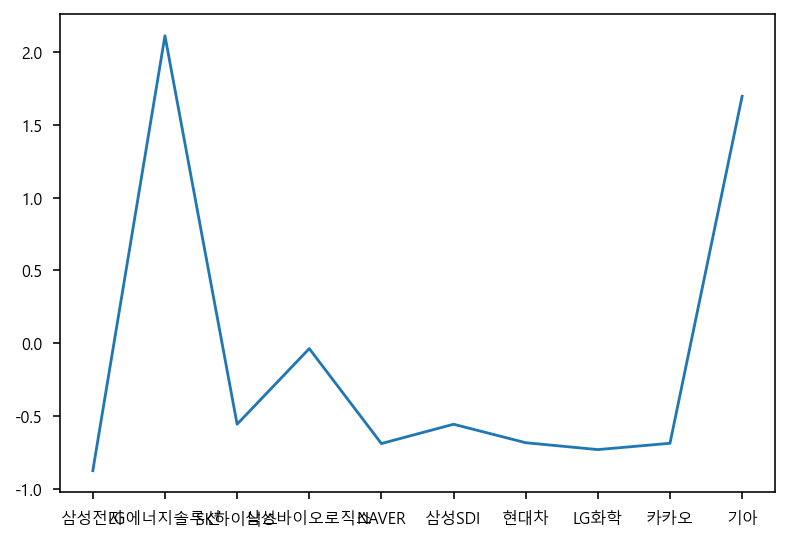

In [63]:
# kurt 로 첨도를 구합니다.
plt.plot(df_norm.kurt())

Object `pd.kurt` not found.
